<a href="https://colab.research.google.com/github/Puru35/Student-Result-Prediction/blob/master/Data%20Pre-processing%20%26%20Model%20Training%20and%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We now import the csv files we created in the last segment of our project, to this section. This section contains the data pre-processing, and model training and testing parts of the project.

Since we cleaned our data in two ways, we will have to use both types of data sets. We will first use "Train 1" and "Test 1".

Table of contents:

    Import the 4 data sets.

    Normalization of features.

    Train and Test Data Set -- 1

      Correlation of Target with all other features.

      Visualization of Features.

      Linear Regression.

        Hypothesis Equation

        Error/Cost Function

        Step Gradient Function

        Gradient descent Function

        Training the Model

        Deviation of Prediction From Actual Output (Train and Test)

      Multivariate Polynomial Regression

        Hypothesis Equation

        Error/Cost Function
        
        Step Gradient Function

        Gradient Descent Function

        Training the Model

        Deviation of Prediction From Actual Output (Train and Test)

    Train and Test Data Set -- 2

      Correlation of Target with all other features.

      Visualization of Features.

      Linear Regression

        Training the model

        Deviation of Prediction From Actual Output (Train and Test)

      Multivariate Polynomial Regression

        Training the Model

        Deviation of Prediction From Actual Output (Train and Test)
    
    Summary


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In the following section, we drop the first column from all 4 data sets, as an unwanted index column is created while converting to csv in the data cleaning process.

#Import the 4 data sets.

In [0]:
data1 = pd.read_csv("Train 1.csv").drop(pd.read_csv("Train 1.csv").columns[0], axis =1)
test_data1 = pd.read_csv("Test 1.csv").drop(pd.read_csv("Test 1.csv").columns[0], axis =1)
data2 = pd.read_csv("Train 2.csv").drop(pd.read_csv("Train 2.csv").columns[0], axis =1)
test_data2 = pd.read_csv("Test 2.csv").drop(pd.read_csv("Test 2.csv").columns[0], axis =1)



For this project refer to the following:

Train 1 -- data1

Train 2 -- data2

Test 1 -- test_data1

Test 2 -- test_data2

Normalised data1 -- df1

Normalised data2 -- df2

Normalised test_data1 -- test_df1

Normalised test_data2 -- test_df2









#Normalization of features.

We normalise our data set to bring each value present, between 0 and 1.

In [0]:
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(data1), columns = data1.columns)
test_df1 = pd.DataFrame(scaler.fit_transform(test_data1), columns = test_data1.columns)
df2 = pd.DataFrame(scaler.fit_transform(data2), columns = data2.columns)
test_df2 = pd.DataFrame(scaler.fit_transform(test_data2), columns = test_data2.columns)

#Train and Test Data Set -- 1

In [4]:
data1 #Original data set

,GP,F,age,R,GT3,A,Medu,Fedu,at_home,health,other,services,teacher,at_home.1,health.1,other.1,services.1,teacher.1,course,home,other.2,reputation,father,mother,other.3,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health.2,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10


##Correlation of Target with all other features.

We now use "Pearson" correlation to find out the linear relationship between each feature and the target.

In [5]:
abs(data1.corr('pearson')['G3']).sort_values(ascending = False)

G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
higher        0.182465
age           0.161579
Fedu          0.152457
goout         0.132791
romantic      0.129970
traveltime    0.117142
health        0.116158
at_home       0.115634
R             0.105756
F             0.103456
paid          0.101996
course        0.098950
internet      0.098483
studytime     0.097820
other         0.096477
reputation    0.095692
teacher.1     0.095374
other.3       0.087774
schoolsup     0.082788
GT3           0.081407
services      0.078429
health.2      0.061335
A             0.058009
teacher       0.057712
health.1      0.057111
Dalc          0.054660
other.1       0.053483
other.2       0.052008
Walc          0.051939
nursery       0.051568
famrel        0.051363
GP            0.045017
famsup        0.039157
absences      0.034247
father        0.032493
mother        0.022338
home          0.021359
services.1    0.016108
activities 

In [6]:
df1 #normalised

,GP,F,age,R,GT3,A,Medu,Fedu,at_home,health,other,services,teacher,at_home.1,health.1,other.1,services.1,teacher.1,course,home,other.2,reputation,father,mother,other.3,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health.2,absences,G1,G2,G3
0,0.0,0.0,0.428571,1.0,0.0,0.0,1.00,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.333333,0.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.50,0.080000,0.1250,0.315789,0.30
1,0.0,0.0,0.285714,1.0,0.0,1.0,0.25,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.333333,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.50,0.053333,0.1250,0.263158,0.30
2,0.0,0.0,0.000000,1.0,1.0,1.0,0.25,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.333333,1.000000,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.50,0.133333,0.2500,0.421053,0.50
3,0.0,0.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.666667,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.00,0.026667,0.7500,0.736842,0.75
4,0.0,0.0,0.142857,1.0,0.0,1.0,0.75,0.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.333333,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.00,0.053333,0.1875,0.526316,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,0.714286,1.0,1.0,0.0,0.50,0.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.333333,0.666667,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.00,1.00,0.75,0.75,1.00,0.75,0.146667,0.3750,0.473684,0.45
391,1.0,1.0,0.285714,1.0,1.0,1.0,0.75,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.25,0.75,1.00,0.50,0.75,0.25,0.040000,0.6875,0.842105,0.80
392,1.0,1.0,0.857143,0.0,0.0,1.0,0.25,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.00,1.00,0.50,0.50,0.50,0.50,0.040000,0.4375,0.421053,0.35
393,1.0,1.0,0.428571,0.0,1.0,1.0,0.75,0.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.666667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.75,0.00,0.50,0.75,1.00,0.000000,0.5000,0.631579,0.50


##Visualization of Features.

Another tool we can use to find correlations is by using a heatmap. Here we can see the correlation between each feature and every other feature present. Due to the fact that there are 46 columns, we can see that this kind of method isn't recommended.

As discussed in the data cleaning process, our first data set was split into many columns, containing either 0 or 1. Hence trying to understand the correlation using heatmap for this data set is a cumbersome process.

Text(0.5, 1.0, 'Correlation Heatmap')

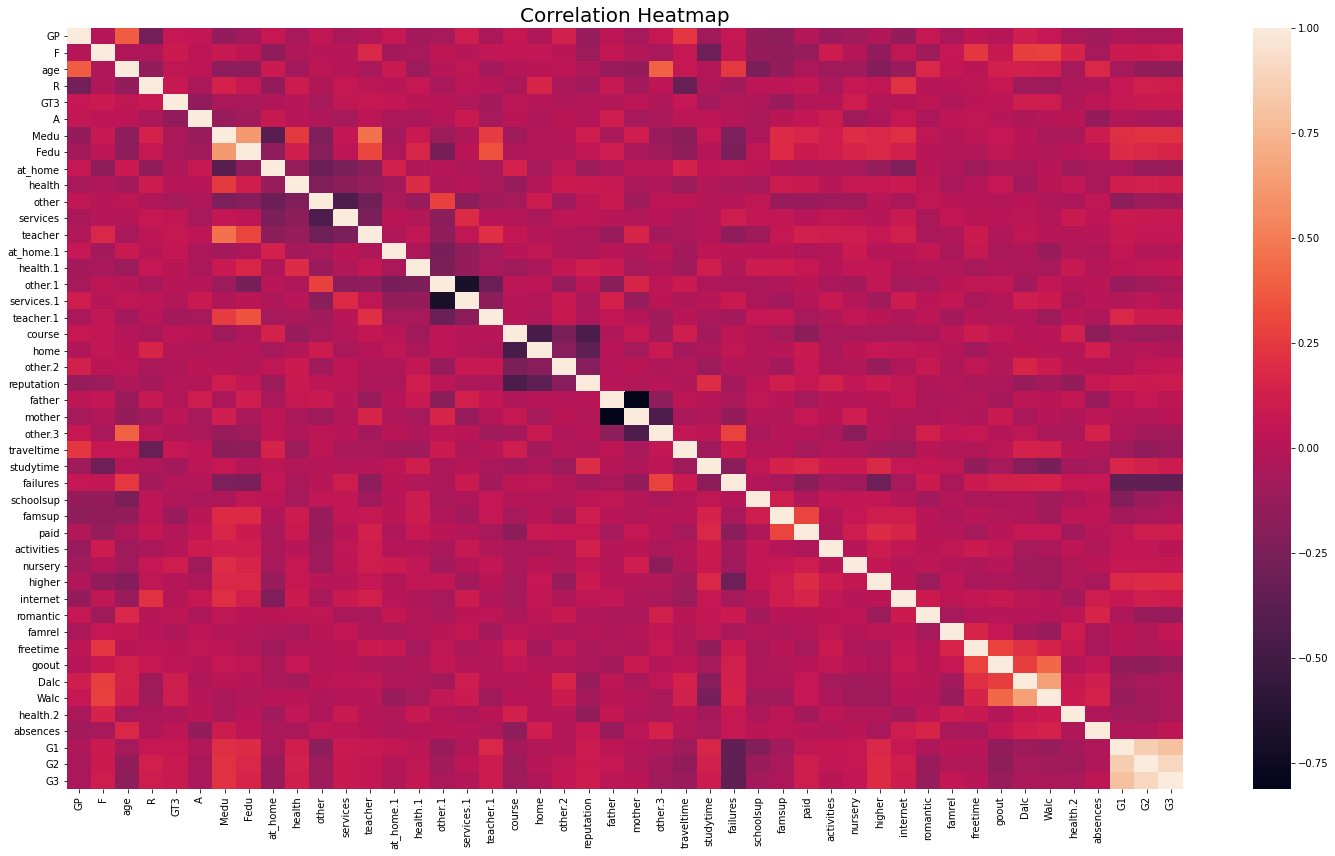

In [7]:
corr=df1.corr()
fig,ax=plt.subplots(figsize=(25,14))
ax=sns.heatmap(corr,annot = False,
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values,)
plt.title('Correlation Heatmap', fontsize=20)

We saw the drawback of using heatmap for a large number of columns. next, we compare each feature with the target "G3" and we end up with the following graphs.

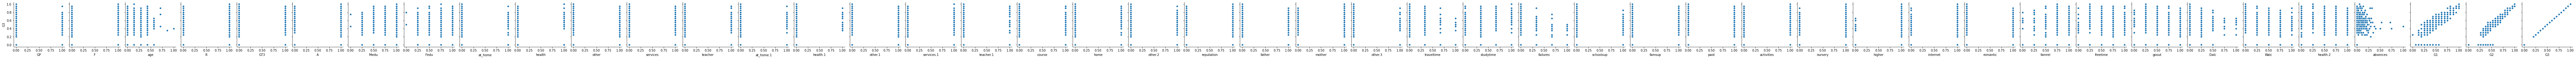

In [8]:
    %matplotlib inline
    plt.rcParams['figure.figsize']=5,5
    columns=list(df1.columns.values)
    g=sns.pairplot(df1,x_vars=columns,y_vars = ['G3'])

Now after visualization, and by observing the correlation, I have chosen "G1", "G2", and "failures" as the necessary attributes for my models.

We will now use two approches to estimate out result. we will first use **Linear Regression**, followed by **Multivariate Polynomial Regression**.

##Linear Regression.

###Hypothesis Equation

In [0]:
def h(a,x,b):
  return (a*x)+b

###Error/Cost Function

In [0]:
def l_error(a,x,b,y):
  m=len(y)
  e=0
  for i in range(m):
    e+=np.power(h(a,x[i],b)-y[i],2)

  return e/(2*m)

###Step Gradient Function

In [0]:
def l_step_gradient(a,x,b,y,learning_rate):
  grad_a=0
  grad_b=0
  m=len(y)
  for i in range(m):
    grad_a+=(1/m)*(h(a,x[i],b)-y[i])*x[i]
    grad_b+=(1/m)*(h(a,x[i],b)-y[i])

  a=a-(grad_a*learning_rate)
  b=b-(grad_b*learning_rate)

  return a,b

###Gradient descent Function

In [0]:
def l_descend(init_a,x,init_b,y,learning_rate,iter):
  a = init_a
  b = init_b

  for i in range(iter):
    if i%1000==0:
      print(f"Error: {l_error(a,x,b,y)} | a: {a} | b: {b}")
    a,b = l_step_gradient(a,x,b,y,learning_rate)

  return a, b

In [0]:
a=0
b=0
learning_rate=0.01

###Training the Model

After defining all our functions, we now plot a graph to see the correlation between "G2" and "G3", and our not-yet-trained model. 

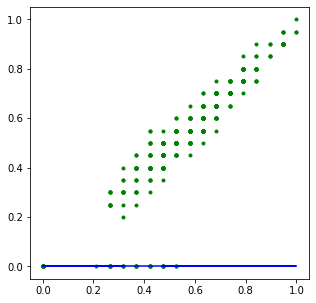

In [14]:
plt.plot(df1["G2"].values,df1["G3"].values,'g.',df1["G2"].values,h(a,df1["G2"].values,b),'b')

Now we train our Linear Regression model.

In [15]:
a,b = l_descend(a,df1["G2"].values,b,df1["G3"].values,learning_rate,10000)

Error: 0.16176582278480986 | a: 0 | b: 0
Error: 0.01196548875877719 | a: 0.4413910736776251 | b: 0.2822236058724185
Error: 0.008750286908074369 | a: 0.5958876107959171 | b: 0.19246204964861124
Error: 0.0069662778583707225 | a: 0.7109708620128065 | b: 0.12559874527923393
Error: 0.00597639030618498 | a: 0.79669567130284 | b: 0.07579267919167106
Error: 0.0054271344791839505 | a: 0.8605515569347093 | b: 0.03869244547635986
Error: 0.005122370606935583 | a: 0.9081174152154156 | b: 0.011056708509885802
Error: 0.0049532672251199426 | a: 0.9435489318499783 | b: -0.009528982770138783
Error: 0.004859437357653954 | a: 0.9699416516789079 | b: -0.024863138178788366
Error: 0.004807374270954232 | a: 0.9896014271029413 | b: -0.03628545666681406


After Training our Model, we end up with the following graph. We can see that our Model has fit very well with the desired output points.

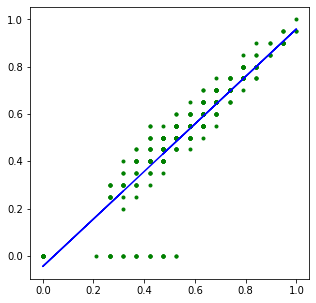

In [16]:
plt.plot(df1["G2"].values, df1["G3"].values, 'g.',
         df1["G2"].values, h(a, df1["G2"].values,b), 'b')

We now calculate the possible deviation of our predicted data points from the actual points given. This is done by using the mean squared error function to give us an accuracy of 6.91% for or training data set.

###Deviation of Prediction From Actual Output (Train and Test)

In [17]:
print("{0:.2f}%".format(np.sqrt(l_error(a, df1["G2"],b, df1["G3"]))*100))

6.91%


When we plug our test data set into our trained model, we get an accuracy of 6.36%.

In [18]:
print("{0:.2f}%".format(np.sqrt(l_error(a, test_df1["G2"],b, test_df1["G3"]))*100))

6.36%


We now try to replace "G2" with "G1", but we observe that we don't get as good an accuracy as we did before, neither with train or test data set.

In [19]:
a,b = l_descend(a,df1["G1"].values,b,df1["G3"].values,learning_rate,10000)

Error: 0.012055982626229741 | a: 1.0042458734589295 | b: -0.04479387178097798
Error: 0.00959350204396 | a: 0.9889605297591293 | b: 0.03008946340060291
Error: 0.009477618040414136 | a: 0.958801909476745 | b: 0.04552603893497236
Error: 0.009419219188057826 | a: 0.9373925739349732 | b: 0.056484167167845836
Error: 0.00938978953553531 | a: 0.9221943233868085 | b: 0.06426322122049537
Error: 0.009374958688478416 | a: 0.9114052533911127 | b: 0.06978548566852218
Error: 0.009367484797162292 | a: 0.9037462119111017 | b: 0.07370568013272556
Error: 0.009363718387112259 | a: 0.8983091430612418 | b: 0.07648858283175666
Error: 0.009361820333733518 | a: 0.8944494280100496 | b: 0.07846413468332639
Error: 0.009360863824330485 | a: 0.8917094589775095 | b: 0.07986655709629881


In [20]:
print("{0:.2f}%".format(np.sqrt(l_error(a, df1["G1"],b, df1["G3"]))*100))

9.67%


In [21]:
print("{0:.2f}%".format(np.sqrt(l_error(a, test_df1["G1"],b, test_df1["G3"]))*100))

6.87%


So now we know that by using Linear Regression, we get a pretty accurate prediction.

We now try take 2 features, and try to fit a polynomial to make our model more accurate, and decreasse the error, by using **Multivariate Polynomial Regression**.

##Multivariate Polynomial Regression

###Hypothesis Equation

In [0]:
def hypothesis(a,b,c,x1,x2):
    return a * x1 + b * np.power(x2, 2) + c

###Error/Cost Function

In [0]:
def error(a,b,c,x1,x2,y):
  m = len(y)
  e = 0
  for i in range(m):
    e += np.power(hypothesis(a,b,c,x1[i], x2[i])-y[i], 2)
  
  return e/(2*m)    

###Step Gradient Function

In [0]:
def step_gradient(a,b,c, x1,x2,y,learning_rate):
  grad_a = 0
  grad_b = 0
  grad_c = 0
  m = len(y)
  for i in range(m):
    grad_a += (1/m) * (hypothesis(a,b,c,x1[i], x2[i]) - y[i]) * x1[i]
    grad_b += (1/m) * (hypothesis(a,b,c,x1[i], x2[i]) - y[i]) * x2[i]
    grad_c += (1/m) * (hypothesis(a,b,c,x1[i], x2[i]) - y[i])

  a = a - (grad_a * learning_rate)
  b = b - (grad_b * learning_rate)
  c = c - (grad_c * learning_rate)

  return a,b,c

###Gradient Descent Function

In [0]:
def descend(init_a,init_b,init_c, x1,x2,y,learning_rate,iters):
  a = init_a
  b = init_b
  c = init_c

  for i in range(iterations):
    if i%1000==0:
      print("Error: %.5f | a: %.5f | b: %.5f | c: %.5f" %(error(a,b,c, x1,x2,y),a,b,c))
    a,b,c = step_gradient(a,b,c, x1,x2,y,learning_rate)

  return a,b,c

###Training the Model

In [26]:
a,b,c = 0,0,0
learning_rate = 0.05
iterations = 10000

a, b, c = descend(a, b, c, df1["G2"], df1["failures"], df1["G3"], learning_rate, iterations)

Error: 0.16177 | a: 0.00000 | b: 0.00000 | c: 0.00000
Error: 0.00566 | a: 0.82214 | b: -0.15696 | c: 0.07172
Error: 0.00488 | a: 0.96385 | b: -0.09291 | c: -0.01498
Error: 0.00477 | a: 1.00800 | b: -0.06451 | c: -0.04259
Error: 0.00475 | a: 1.02251 | b: -0.05468 | c: -0.05170
Error: 0.00475 | a: 1.02733 | b: -0.05139 | c: -0.05472
Error: 0.00474 | a: 1.02893 | b: -0.05030 | c: -0.05573
Error: 0.00474 | a: 1.02946 | b: -0.04994 | c: -0.05606
Error: 0.00474 | a: 1.02964 | b: -0.04981 | c: -0.05617
Error: 0.00474 | a: 1.02970 | b: -0.04977 | c: -0.05621


###Deviation of Prediction From Actual Output (Train and Test)

In [27]:
print("{0:.2f}%".format(np.sqrt(error(a,b,c, df1["G2"], df1["failures"], df1["G3"]))*100)) 

6.89%


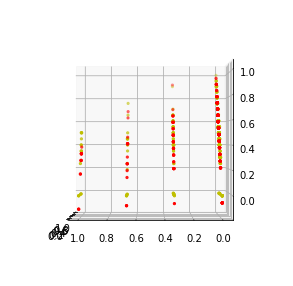

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(0,180)

ax.scatter(df1["G2"], df1["failures"], df1["G3"], c='y', marker='.')
ax.scatter(df1["G2"], df1["failures"], hypothesis(a,b,c,df1["G2"], df1["failures"]), c='r', marker='.')

In [29]:
print("{0:.2f}%".format(np.sqrt(error(a,b,c, test_df1["G2"], test_df1["failures"], test_df1["G3"]))*100)) 

6.28%


After following similar steps to Linear Regression we end up with an accuracy, a fraction improved, but not that different to the one we observed in Linear Regression.

This observation shows us that, adding another feature apart from "G2", does not affect our accuracy that much. Still, knowing this, we will try to plug in our second train and test data set to see if there is any difference.

We follow similar steps as before, so feel free to refer to the explanations given before.

#Train and Test Data Set -- 2

In [30]:
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,0.428571,1.0,0.0,0.0,1.00,1.00,0.00,1.00,0.000000,0.5,0.333333,0.333333,0.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.50,0.181818,0.1250,0.1875,0.176471
1,0.0,0.0,0.285714,1.0,0.0,1.0,0.25,0.25,0.00,0.50,0.000000,0.0,0.000000,0.333333,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.50,0.121212,0.1250,0.1250,0.176471
2,0.0,0.0,0.000000,1.0,1.0,1.0,0.25,0.25,0.00,0.50,0.666667,0.5,0.000000,0.333333,1.000000,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.50,0.303030,0.2500,0.3125,0.411765
3,0.0,0.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.25,0.75,0.333333,0.5,0.000000,0.666667,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.00,0.060606,0.7500,0.6875,0.705882
4,0.0,0.0,0.142857,1.0,0.0,1.0,0.75,0.75,0.50,0.50,0.333333,0.0,0.000000,0.333333,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.00,0.121212,0.1875,0.4375,0.411765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,0.714286,1.0,1.0,0.0,0.50,0.50,0.75,0.75,0.000000,1.0,0.000000,0.333333,0.666667,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.00,1.00,0.75,0.75,1.00,0.75,0.333333,0.3750,0.3750,0.352941
391,1.0,1.0,0.285714,1.0,1.0,1.0,0.75,0.25,0.75,0.75,0.000000,0.5,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.25,0.75,1.00,0.50,0.75,0.25,0.090909,0.6875,0.8125,0.764706
392,1.0,1.0,0.857143,0.0,0.0,1.0,0.25,0.25,0.50,0.50,0.000000,1.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.00,1.00,0.50,0.50,0.50,0.50,0.090909,0.4375,0.3125,0.235294
393,1.0,1.0,0.428571,0.0,1.0,1.0,0.75,0.50,0.75,0.50,0.000000,0.5,0.666667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.75,0.00,0.50,0.75,1.00,0.000000,0.5000,0.5625,0.411765


##Correlation of Target with all other features.

In [31]:
abs(data2.corr('pearson')['G3']).sort_values(ascending = False)

G3            1.000000
G2            0.939188
G1            0.851008
failures      0.358565
Medu          0.221824
higher        0.175033
age           0.164677
Fedu          0.160467
goout         0.146652
romantic      0.120391
traveltime    0.118814
schoolsup     0.117905
reason        0.115886
address       0.115032
sex           0.107966
studytime     0.107569
internet      0.105222
Mjob          0.103090
paid          0.081555
Walc          0.080917
famsize       0.077208
Dalc          0.074477
guardian      0.071719
health        0.068146
Pstatus       0.054756
school        0.054514
famrel        0.050990
Fjob          0.049534
nursery       0.049058
famsup        0.046313
activities    0.024963
freetime      0.005473
absences      0.000204
Name: G3, dtype: float64

##Visualization of Features.


Text(0.5, 1.0, 'Correlation Heatmap')

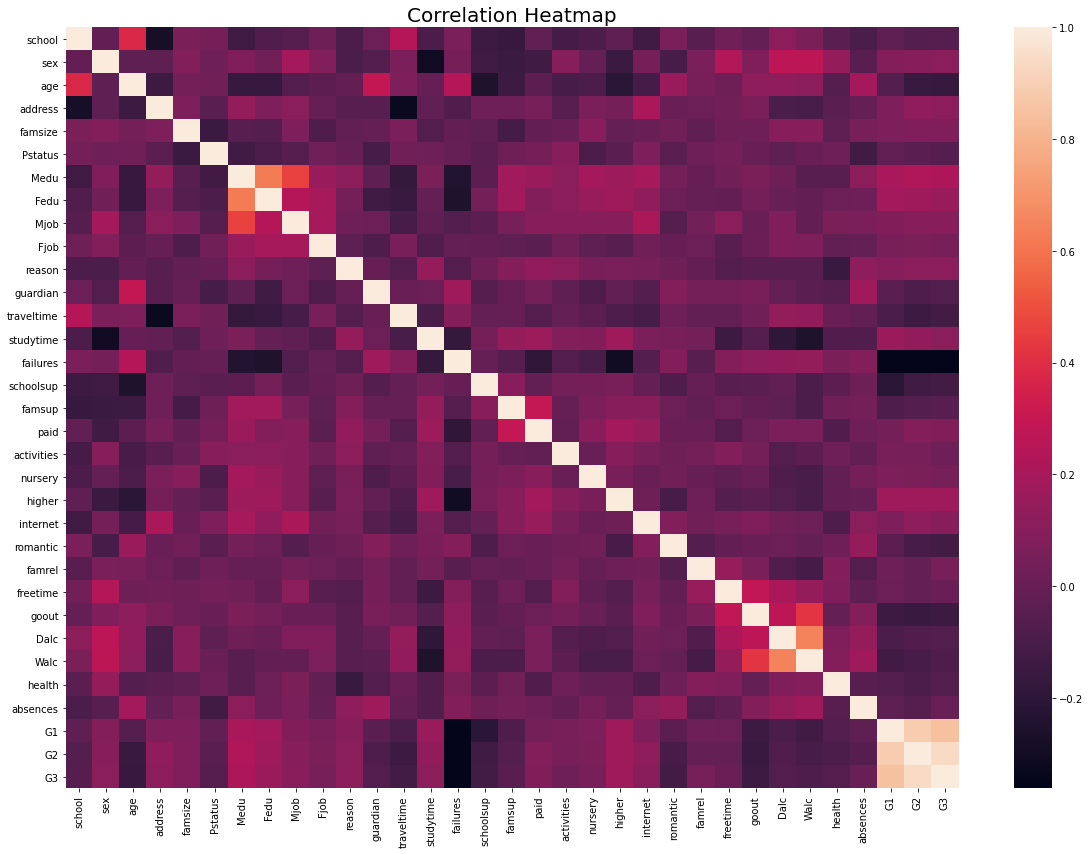

In [32]:
corr=df2.corr()
fig,ax=plt.subplots(figsize=(20,14))
ax=sns.heatmap(corr,annot = False,
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values,)
plt.title('Correlation Heatmap', fontsize=20)

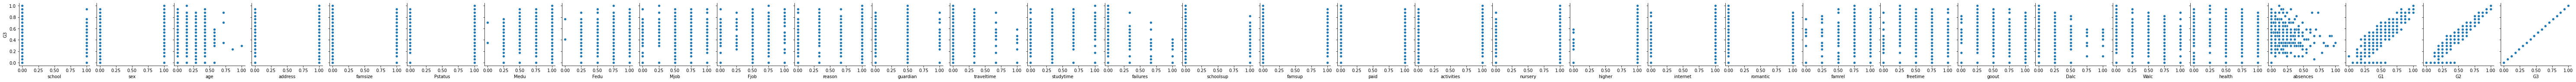

In [33]:
    %matplotlib inline
    plt.rcParams['figure.figsize']=5,5
    columns=list(df2.columns.values)
    g=sns.pairplot(df2,x_vars=columns,y_vars = ['G3'])

##Linear Regression

Since we have Functions for this approach defined, we will simply call it, without defining it a second time.

###Training the model

In [0]:
a=0
b=0
learning_rate=0.01

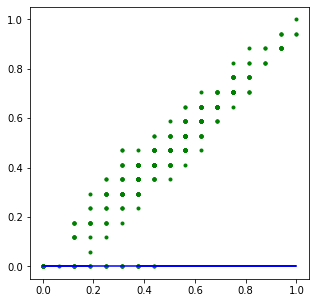

In [35]:
plt.plot(df2["G2"].values,df2["G3"].values,'g.',df2["G2"].values,h(a,df2["G2"].values,b),'b')

In [36]:
a,b = l_descend(a,df2["G2"].values,b,df2["G3"].values,learning_rate,10000)

Error: 0.12985414567912054 | a: 0 | b: 0
Error: 0.010534073163740542 | a: 0.44901729893405373 | b: 0.24466115495653923
Error: 0.00660117257962673 | a: 0.6247802243646989 | b: 0.15540748504574436
Error: 0.004778629849839387 | a: 0.7444289259371775 | b: 0.09464788773574989
Error: 0.003934046588193999 | a: 0.825878790306957 | b: 0.05328629420822098
Error: 0.003542658845018928 | a: 0.8813251120705726 | b: 0.0251297313811606
Error: 0.0033612861225602213 | a: 0.9190697371955132 | b: 0.005962384027713499
Error: 0.0032772363151104115 | a: 0.9447640786866566 | b: -0.007085629212545754
Error: 0.0032382868521669984 | a: 0.9622552892226774 | b: -0.015967956348301542
Error: 0.0032202373085736275 | a: 0.9741622861823339 | b: -0.022014527109216846


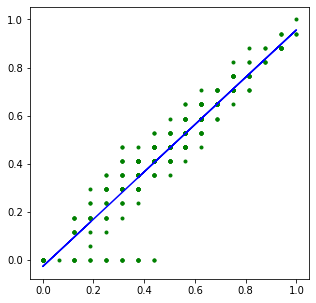

In [37]:
plt.plot(df2["G2"].values, df2["G3"].values, 'g.',
         df2["G2"].values, h(a, df2["G2"].values,b), 'b')

###Deviation of Prediction From Actual Output (Train and Test)

In [38]:
print("{0:.2f}%".format(np.sqrt(l_error(a, df2["G2"],b, df2["G3"]))*100))

5.67%


In [39]:
print("{0:.2f}%".format(np.sqrt(l_error(a, test_df2["G2"],b, test_df2["G3"]))*100))

7.87%


After using Linear Regression on our second data set, we observe that, compared to the first one, we get a slightly better accuracy for our train data set, although the accuracy for our test data set does decrease, though it is very minute. 

In [40]:
a,b = l_descend(a,df1["G1"].values,b,df1["G3"].values,learning_rate,10000)

Error: 0.011444935150487258 | a: 0.9822678759186922 | b: -0.026130680163248866
Error: 0.00952058697399748 | a: 0.9712239651517325 | b: 0.039167749801394654
Error: 0.009440873051670103 | a: 0.9462109112680438 | b: 0.05197060012529855
Error: 0.009400701833571444 | a: 0.928454363542979 | b: 0.061059089890229276
Error: 0.00938045785715156 | a: 0.9158491866719034 | b: 0.06751090826975609
Error: 0.009370256060923189 | a: 0.9069009110043099 | b: 0.0720909827905453
Error: 0.00936511494417187 | a: 0.9005486290615627 | b: 0.07534232704452365
Error: 0.00936252411792335 | a: 0.8960392143565283 | b: 0.07765042037573361
Error: 0.009361218490960426 | a: 0.8928380307243697 | b: 0.079288910307723
Error: 0.009360560530293523 | a: 0.8905655458638919 | b: 0.08045205619135357


In [41]:
print("{0:.2f}%".format(np.sqrt(l_error(a, df2["G1"],b, df2["G3"]))*100))

9.94%


In [42]:
print("{0:.2f}%".format(np.sqrt(l_error(a, test_df1["G1"],b, test_df1["G3"]))*100))

6.87%


By replacing "G2" with "G1", even with our second Data set, the accuraacy remains pretty much the same, compared to the first data set

In a similar fashion to the way we use Multivariate Polynomial Regression on our first data set, we will do the same on our second data set. Since we already have the functions defined for us, we can simply insert the required values.

##Multivariate Polynomial Regression

Since we have Functions for this approach defined, we will simply call it, without defining it a second time.

###Training the Model

In [43]:
a,b,c = 0,0,0
learning_rate = 0.05
iterations = 10000

a, b, c = descend(a, b, c, df2["G2"], df2["failures"], df2["G3"], learning_rate, iterations)

Error: 0.12985 | a: 0.00000 | b: 0.00000 | c: 0.00000
Error: 0.00380 | a: 0.84638 | b: -0.12353 | c: 0.05132
Error: 0.00327 | a: 0.95627 | b: -0.05577 | c: -0.00912
Error: 0.00322 | a: 0.98253 | b: -0.03303 | c: -0.02402
Error: 0.00321 | a: 0.98935 | b: -0.02681 | c: -0.02791
Error: 0.00321 | a: 0.99115 | b: -0.02516 | c: -0.02894
Error: 0.00321 | a: 0.99162 | b: -0.02472 | c: -0.02921
Error: 0.00321 | a: 0.99175 | b: -0.02460 | c: -0.02928
Error: 0.00321 | a: 0.99178 | b: -0.02457 | c: -0.02930
Error: 0.00321 | a: 0.99179 | b: -0.02456 | c: -0.02931


###Deviation of Prediction From Actual Output (Train and Test)

In [44]:
print("{0:.2f}%".format(np.sqrt(error(a,b,c, df2["G2"], df2["failures"], df2["G3"]))*100)) 

5.67%


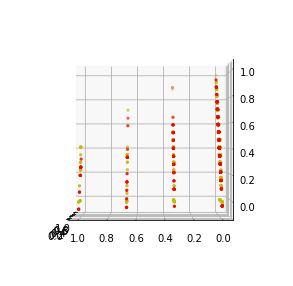

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(0,180)

ax.scatter(df2["G2"], df2["failures"], df2["G3"], c='y', marker='.')
ax.scatter(df2["G2"], df2["failures"], hypothesis(a,b,c,df2["G2"], df2["failures"]), c='r', marker='.')

In [46]:
print("{0:.2f}%".format(np.sqrt(error(a,b,c, test_df2["G2"], test_df2["failures"], test_df2["G3"]))*100)) 

7.84%


As we can see above, our accuracies differ ever so slightly with the ones we obtained in Linear Regression, for the same data set. But if we comapred it to the accuracies we got for Multivariate Polynomial Regression in the first data set, we end up with a similar conclusion, when we compared the two data sets using Linear Regression.

#Summary

By taking into account the **various** accuracies we have, we can conclude that there was not substantial difference in taking an extra feature, or even trying to fit a polynomial curve. This means that "G2" is such a dominating feature, that even adding another attribute does not afffect the model that much.

This means that, if we need to predict the final marks of a student, even  though all attributes do have a correlation to the final marks, the marks obtained in the second period affect the final marks greatly. So we can conclude that for a student to do well in his/her final exams, the student must do well in the second period test as well.